![title](cohort.PNG)

### What is cohort analysis?
A cohort is simply a group of people with shared characteristics.

Cohort analysis is a type of behavioral analytics in which you group your users based on their shared traits to better<br> track and understand their actions. Cohort analysis allows you to ask more specific, targeted questions and make informed<br> product decisions that will reduce churn and drastically increase revenue. You could also call it customer churn analysis.

# Import  libraries

In [1]:
# Pandas for data analysis
import pandas as pd 

# Matplotlib and Seaborn  for visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns


# Read in the data

In [58]:
df = pd.read_csv('data_com.csv',parse_dates= ['Date'])
df.head()

,IDcustomer,Date,Item
0,1808,2015-07-21,tropicana
1,2552,2015-05-01,cake
2,2300,2015-09-19,hamburger_saucisson
3,1187,2015-12-12,bisarb
4,3037,2015-01-02,soupou_kandia_viande


## Convert datetime
Convert datetime to monthly datetime<br>i.e (from **2015-07-21** to **2015-07**.) <br>

This transformation allows us to do our cohort analysis on a monthly basis.

In [59]:
df2 = df.copy()
df2['order_month'] = df2['Date'].dt.to_period('M')
df2

,IDcustomer,Date,Item,order_month
0,1808,2015-07-21,tropicana,2015-07
1,2552,2015-05-01,cake,2015-05
2,2300,2015-09-19,hamburger_saucisson,2015-09
3,1187,2015-12-12,bisarb,2015-12
4,3037,2015-01-02,soupou_kandia_viande,2015-01
...,...,...,...,...
38760,4471,2014-08-10,brochette_fruit,2014-08
38761,2022,2014-02-23,brioche,2014-02
38762,1097,2014-04-16,brochette_crevette,2014-04
38763,1510,2014-03-12,cafecreme,2014-03


## Create a Cohort
Group each customer's transactions and select the first month of purchase <br> from that particular customer's transactions.

In [75]:
df2['cohort'] = df2.groupby('IDcustomer')['order_month'] \
             .transform('min') \
             
df2

,IDcustomer,Date,Item,order_month,cohort
0,1808,2015-07-21,tropicana,2015-07,2014-11
1,2552,2015-05-01,cake,2015-05,2014-02
2,2300,2015-09-19,hamburger_saucisson,2015-09,2014-03
3,1187,2015-12-12,bisarb,2015-12,2014-08
4,3037,2015-01-02,soupou_kandia_viande,2015-01,2015-01
...,...,...,...,...,...
38760,4471,2014-08-10,brochette_fruit,2014-08,2014-04
38761,2022,2014-02-23,brioche,2014-02,2014-02
38762,1097,2014-04-16,brochette_crevette,2014-04,2014-03
38763,1510,2014-03-12,cafecreme,2014-03,2014-03


# Number of customers in each month in a given Cohort
Group data by **cohort** then group each month in that cohort by **Order_month**  <br>and then count how many customers are there in each month.

In [62]:
df_cohort = df2.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('IDcustomer', 'nunique')) \
              .reset_index(drop=False)
df_cohort

,cohort,order_month,n_customers
0,2014-01,2014-01,605
1,2014-01,2014-02,98
2,2014-01,2014-03,87
3,2014-01,2014-04,87
4,2014-01,2014-05,108
...,...,...,...
292,2015-10,2015-11,3
293,2015-10,2015-12,2
294,2015-11,2015-11,18
295,2015-11,2015-12,3


## Period (cohort lifetime)

Calculate the difference between a cohort (first time of purchase) and the rest of the months <br>(the next month customers from that cohort returned to patronised the store) .<br>
This allow us to study the life time of each cohort with respect to time periods given as 1,2,3,...<br>

where <br>
             
1 =  one month period (first time petronage)<br>
2 =  two month period (Second time visiting the store)<br>
3,4,.. = etc

In [76]:
year_diff =  df_cohort.order_month.dt.year - df_cohort.cohort.dt.year
mon_diff = df_cohort.order_month.dt.month - df_cohort.cohort.dt.month 

df_cohort['period_number'] = year_diff*12 + mon_diff + 1
df_cohort

,cohort,order_month,n_customers,period_number
0,2014-01,2014-01,605,1
1,2014-01,2014-02,98,2
2,2014-01,2014-03,87,3
3,2014-01,2014-04,87,4
4,2014-01,2014-05,108,5
...,...,...,...,...
292,2015-10,2015-11,3,2
293,2015-10,2015-12,2,3
294,2015-11,2015-11,18,1
295,2015-11,2015-12,3,2


## Pivot Table
Group by Cohort according to lifetime of that cohort (period_number).<br>
This allow us to see how many customers are in each month of a particular cohort.<br>

The Pivoted table below allow us to see the numbers of customers that returned to <br> purchase goods from the store in any given period of the month in a particular cohort. 




In [120]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers',
                                       )
cohort_pivot

period_number,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
cohort,,,,,,,,,,,,,,,,,,,,,
2014-01,605.0,98.0,87.0,87.0,108.0,102.0,103.0,74.0,74.0,102.0,...,81.0,86.0,82.0,90.0,78.0,84.0,67.0,93.0,84.0,73.0
2014-02,522.0,81.0,76.0,91.0,74.0,78.0,84.0,73.0,83.0,92.0,...,70.0,76.0,76.0,68.0,76.0,70.0,74.0,66.0,62.0,NaN
2014-03,440.0,62.0,79.0,64.0,70.0,68.0,58.0,88.0,69.0,55.0,...,52.0,59.0,59.0,75.0,63.0,57.0,68.0,54.0,NaN,NaN
2014-04,383.0,53.0,57.0,66.0,58.0,55.0,70.0,59.0,66.0,58.0,...,48.0,41.0,60.0,46.0,58.0,63.0,46.0,NaN,NaN,NaN
2014-05,319.0,39.0,49.0,57.0,57.0,53.0,42.0,56.0,40.0,30.0,...,41.0,54.0,42.0,31.0,45.0,46.0,NaN,NaN,NaN,NaN
2014-06,262.0,45.0,50.0,39.0,46.0,32.0,35.0,46.0,36.0,37.0,...,40.0,35.0,30.0,33.0,35.0,NaN,NaN,NaN,NaN,NaN
2014-07,225.0,28.0,27.0,26.0,34.0,36.0,39.0,28.0,28.0,34.0,...,20.0,29.0,32.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-08,202.0,26.0,32.0,23.0,29.0,32.0,17.0,31.0,30.0,27.0,...,24.0,27.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09,147.0,22.0,23.0,24.0,25.0,26.0,24.0,20.0,24.0,24.0,...,22.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Customers Retention
Here we calculated the percentage of customers that came back after their first purchase.


In [121]:
# select only the first column which is the first day of purchase
cohort_size = cohort_pivot.iloc[:,0] 

# Divide other columns by the first columns
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
retention_matrix

period_number,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
cohort,,,,,,,,,,,,,,,,,,,,,
2014-01,1.0,0.161983,0.143802,0.143802,0.178512,0.168595,0.170248,0.122314,0.122314,0.168595,...,0.133884,0.142149,0.135537,0.148760,0.128926,0.138843,0.110744,0.153719,0.138843,0.120661
2014-02,1.0,0.155172,0.145594,0.174330,0.141762,0.149425,0.160920,0.139847,0.159004,0.176245,...,0.134100,0.145594,0.145594,0.130268,0.145594,0.134100,0.141762,0.126437,0.118774,NaN
2014-03,1.0,0.140909,0.179545,0.145455,0.159091,0.154545,0.131818,0.200000,0.156818,0.125000,...,0.118182,0.134091,0.134091,0.170455,0.143182,0.129545,0.154545,0.122727,NaN,NaN
2014-04,1.0,0.138381,0.148825,0.172324,0.151436,0.143603,0.182768,0.154047,0.172324,0.151436,...,0.125326,0.107050,0.156658,0.120104,0.151436,0.164491,0.120104,NaN,NaN,NaN
2014-05,1.0,0.122257,0.153605,0.178683,0.178683,0.166144,0.131661,0.175549,0.125392,0.094044,...,0.128527,0.169279,0.131661,0.097179,0.141066,0.144201,NaN,NaN,NaN,NaN
2014-06,1.0,0.171756,0.190840,0.148855,0.175573,0.122137,0.133588,0.175573,0.137405,0.141221,...,0.152672,0.133588,0.114504,0.125954,0.133588,NaN,NaN,NaN,NaN,NaN
2014-07,1.0,0.124444,0.120000,0.115556,0.151111,0.160000,0.173333,0.124444,0.124444,0.151111,...,0.088889,0.128889,0.142222,0.106667,NaN,NaN,NaN,NaN,NaN,NaN
2014-08,1.0,0.128713,0.158416,0.113861,0.143564,0.158416,0.084158,0.153465,0.148515,0.133663,...,0.118812,0.133663,0.089109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09,1.0,0.149660,0.156463,0.163265,0.170068,0.176871,0.163265,0.136054,0.163265,0.163265,...,0.149660,0.149660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualise the Customer Retention Through the aid of HeatMap chart

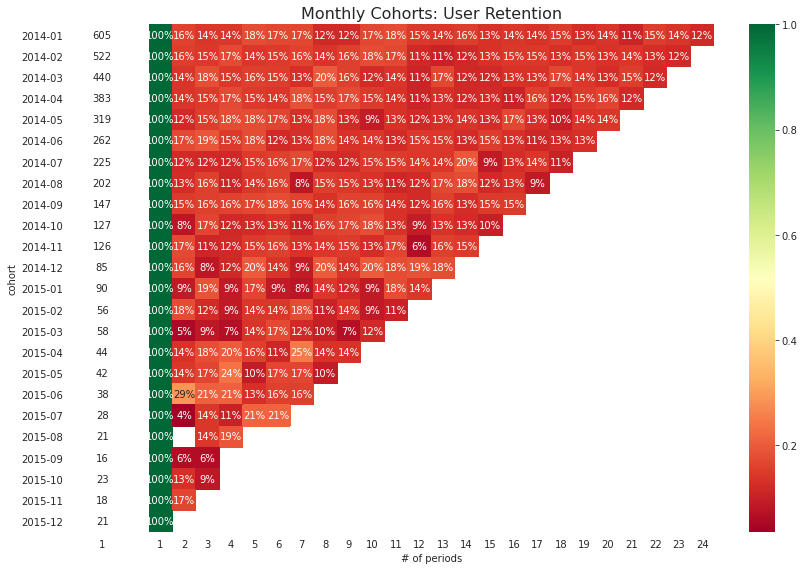

In [131]:

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()